Delivery Time Analysis for an E-commerce Company
An e-commerce company tracks delivery times (in minutes) for 15 orders:
[25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95]
The company wants to analyze the delivery performance using percentiles and detect if there are any unusual delivery times.
Question 1:
 Calculate Q1 and Q3.
Question 2:
 Find the Interquartile Range (IQR).
 Question 3:
 Detect Outliers using the IQR method.


In [5]:
data = [25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95]
import numpy as np
Q1 = np.percentile(data, 25)
Q3 = np.percentile(data, 75)
IQR = Q3 - Q1
print("Q1:",Q1)
print("Q3:",Q3)
print("IQR:",IQR)
lower_bound = Q1 - 1.5 * IQR
print("Lower Bound:",lower_bound)
upper_bound = Q3 + 1.5 * IQR
print("Upper Bound:",upper_bound)
outliers = [x for x in data if x < lower_bound or x > upper_bound]
print("Outliers:", outliers)


Q1: 42.5
Q3: 77.5
IQR: 35.0
Lower Bound: -10.0
Upper Bound: 130.0
Outliers: []


Scenario 2: Student Score Analysis
A teacher is analyzing the mathematics scores of students in her class. The scores are:
 [45, 50, 55, 60, 60, 62, 63, 65, 90, 95]
Question 1:
 Calculate the mean, median, and mode of the scores.
Question 2:
 Explain why the median might be a better representation than the mean in this case.


In [ ]:

scores = [45, 50, 55, 60, 60, 62, 63, 65, 90, 95]

import numpy as np
import scipy.stats as stats
mean_score = np.mean(scores)
median_score = np.median(scores)
mode_score = stats.mode(scores).mode

print("Mean:", mean_score)
print("Median:", median_score)
print("Mode:", mode_score)
mode_count = stats.mode(scores).count
print("Mode Count:", mode_count)

Mean: 64.5
Median: 61.0
Mode: 60
Mode Count: 2


Scenario 3: Grocery Store Customer Analysis
A grocery store manager tracks how many customers visit the store daily for a month:
 [5, 10, 8, 15, 20, 5, 12, 14, 10, 18]
Question 1:
 Create a frequency distribution table for this data.


In [34]:
g = [5, 10, 8, 15, 20, 5, 12, 14, 10, 18]
import numpy as np
import pandas as pd
df  = pd.DataFrame(g, columns=['Values'])

# Calculate frequency for each unique value
frequency = df['Values'].groupby(df['Values']).transform('size')

# Add frequency column to DataFrame
df['Frequency'] = frequency

print(df)

   Values  Frequency
0       5          2
1      10          2
2       8          1
3      15          1
4      20          1
5       5          2
6      12          1
7      14          1
8      10          2
9      18          1


Real Estate Model Analysis
A real estate model has three variables:
●	House Size
●	Number of Rooms
●	Number of Bathrooms
Question 1:
 How can you detect multicollinearity in this model?


In [2]:
import numpy as np
import pandas as pd
data = {'house_size': [1500, 1600, 1700, 1800, 1900, 2000, 2100],
        'no_of_rooms': [3, 4, 3, 5, 4, 5, 6],
        'no_of_bathrooms': [2, 2, 3, 2, 3, 4, 3]}

df = pd.DataFrame(data)
correlation_matrix = df.corr()
print("Correlation Matrix:\n", correlation_matrix)


Correlation Matrix:
                  house_size  no_of_rooms  no_of_bathrooms
house_size         1.000000     0.832050         0.714435
no_of_rooms        0.832050     1.000000         0.311376
no_of_bathrooms    0.714435     0.311376         1.000000


In [1]:
#multi collinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd
data = {'house_size': [1500, 1600, 1700, 1800, 1900, 2000, 2100],
        'no_of_rooms': [3, 4, 3, 5, 4, 5, 6],
        'no_of_bathrooms': [2, 2, 3, 2, 3, 4, 3]}
df = pd.DataFrame(data)
X = df[['house_size', 'no_of_rooms', 'no_of_bathrooms']]
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                     for i in range(len(X.columns))]
print(vif_data)


           feature         VIF
0       house_size  105.614570
1      no_of_rooms   47.411582
2  no_of_bathrooms   32.328767


Correlation detects multicollinearity only between two independent variables, whereas VIF detects multicollinearity caused by the combined effect of multiple independent variables.

Scenario 5: Medicine Effectiveness Study
A company made a new medicine to lower blood pressure. They gave it to one group and gave a fake pill (placebo) to another group.
Question 1:
 How can the company check if the new medicine works?


In [ ]:
import pandas as pd
from scipy.stats import ttest_ind

# Create the dataset
data = {
    "Patient_ID": [1,2,3,4,5,6,7,8,9,10],
    "Group": ["Medicine","Medicine","Medicine","Medicine","Medicine",
              "Placebo","Placebo","Placebo","Placebo","Placebo"],
    "BP_Before": [150,148,155,160,152,149,151,153,147,154],
    "BP_After":  [135,132,140,142,138,146,148,150,145,151]
}

df = pd.DataFrame(data)

# Calculate blood pressure change
df["BP_Change"] = df["BP_Before"] - df["BP_After"]

print(df)

# Separate the groups
medicine_group = df[df["Group"] == "Medicine"]["BP_Change"]
placebo_group = df[df["Group"] == "Placebo"]["BP_Change"]
# Perform t-test
t_stat, p_value = ttest_ind(medicine_group, placebo_group)
print("T-statistic:", t_stat)
print("P-value:", p_value)


if p_value < 0.05:
    print("Reject the null hypothesis: Significant difference between groups. medicine is working")
else:
    print("Fail to reject the null hypothesis: No significant difference between groups. no effect of medicine")


   Patient_ID     Group  BP_Before  BP_After  BP_Change
0           1  Medicine        150       135         15
1           2  Medicine        148       132         16
2           3  Medicine        155       140         15
3           4  Medicine        160       142         18
4           5  Medicine        152       138         14
5           6   Placebo        149       146          3
6           7   Placebo        151       148          3
7           8   Placebo        153       150          3
8           9   Placebo        147       145          2
9          10   Placebo        154       151          3
T-statistic: 18.101933598375616
P-value: 8.906329699239375e-08
Reject the null hypothesis: Significant difference between groups. medicine is working


Scenario 6: Identifying Outliers in Sales Data
A company wants to find any unusual spikes in sales.
Question 1:
 How can the company detect outliers in their sales data?


In [11]:
data = [10, 12, 11, 1,3, 13, 12, 14, 11, 10, 26, 12, 100]

import numpy as np
Q1 = np.percentile(data, 25)
Q3 = np.percentile(data, 75)
IQR = Q3 - Q1
print("IQR:", IQR)
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

lower_bound = Q1 - 1.5 * IQR
print("Lower Bound:",lower_bound)
upper_bound = Q3 + 1.5 * IQR
print("Upper Bound:",upper_bound)
outliers = [x for x in data if x < lower_bound or x > upper_bound]
print("Outliers:", outliers)


IQR: 3.0
Lower Bound: 5.5
Upper Bound: 17.5
Outliers: [1, 3, 26, 100]


Scenario 7: Understanding Customer Satisfaction
A restaurant conducted a survey to rate customer satisfaction on a scale of 1 to 5:
 [5, 4, 4, 5, 3, 4, 5, 2, 4, 3]
Question 1:
 How can the restaurant summarize the overall satisfaction?


Mean Rating: 3.9
Median Rating: 4.0
Mode Rating: 4


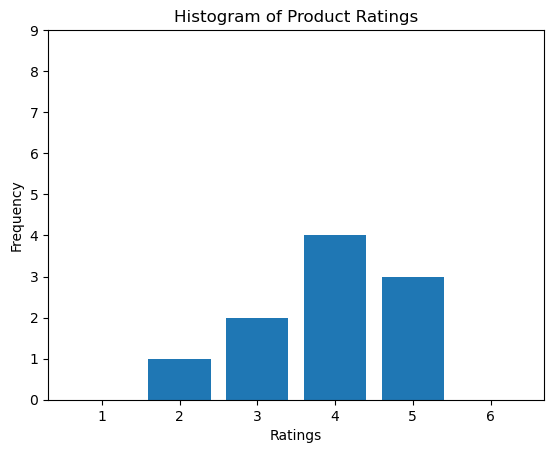

In [14]:
ratings = [5, 4, 4, 5, 3, 4, 5, 2, 4, 3]
import numpy as np
import scipy.stats as stats
mean_rating = np.mean(ratings)
median_rating = np.median(ratings)
mode_rating = stats.mode(ratings).mode
print("Mean Rating:", mean_rating)
print("Median Rating:", median_rating)
print("Mode Rating:", mode_rating)
import matplotlib.pyplot as plt
plt.hist(ratings, bins=range(1, 8), align='left', rwidth=0.8)
plt.xlabel('Ratings')
plt.ylabel('Frequency')
plt.title('Histogram of Product Ratings')
plt.xticks(range(1, 7))
plt.yticks(range(0, 10))
plt.show()

